# Preliminary Analysis


## Import Libraries

In [6]:
# Import libraries and dependencies
import requests
from dotenv import load_dotenv 
import json
import numpy as np
from datetime import datetime, timedelta
import os
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline
pn.extension('plotly')
import hvplot.pandas


## Reading in Data

In [7]:
#Reading in CSV files
BXP_REC1_data = Path("BXP2000.csv")
BXP_REC2_data = Path("BXP2007.csv")
GC_REC1_data = Path("GC_2000.csv")
GC_REC2_data = Path("GC_2007.csv")
GC_REC3_data = Path("GC_2014.csv")
HP_REC1_data = Path("hp_2000.csv")
HP_REC2_data = Path("hp_2007.csv")
PLD_REC1_data = Path("PLD_2000.csv")
PLD_REC2_data = Path("PLD_2007.csv")
WELL_REC1_data = Path("WELL_2000.csv")
WELL_REC2_data = Path("WELL_2007.csv")
BOND_REC1_data = Path("BOND_PNIGX_2000.csv")
BOND_REC2_data = Path("BOND_PNIGX_2007.csv")
BFM_REC1_data = Path("BFM_2000.csv")
BFM_REC2_data = Path("BFM_2007.csv")
MAD_REC1_data = Path("MAD_2000.csv")
MAD_REC2_data = Path("MAD_2007.csv")
MAD_REC3_data = Path("MAD_2014.csv")


BXPR1_df = pd.read_csv(BXP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BXPR2_df = pd.read_csv(BXP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR1_df = pd.read_csv(GC_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR2_df = pd.read_csv(GC_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR3_df = pd.read_csv(GC_REC3_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR1_df = pd.read_csv(HP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR2_df = pd.read_csv(HP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR1_df = pd.read_csv(PLD_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR2_df = pd.read_csv(PLD_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR1_df = pd.read_csv(WELL_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR2_df = pd.read_csv(WELL_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PNGR1_df = pd.read_csv(BOND_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PNGR2_df = pd.read_csv(BOND_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BFMR1_df = pd.read_csv(BFM_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BFMR2_df = pd.read_csv(BFM_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
MADR1_df = pd.read_csv(MAD_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
MADR2_df = pd.read_csv(MAD_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
MADR3_df = pd.read_csv(MAD_REC3_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

## API Data Pull for S&P500, Gold, and Bonds

In [8]:
# API Data Pull

## Requests URLs
sp500_url = "https://www.quandl.com/api/v3/datasets/MULTPL/SP500_INFLADJ_MONTH.json?api_key=ACX1MxGcHSzdXsTV8JPU&start_date=1990-01-01&end_date=2014-03-01"


## Convert to DataFrames
sp500_data = pd.DataFrame(requests.get(sp500_url).json()["dataset"]["data"])
sp500_data.columns = ["Date", "S&P500"]

## Set Indexes as Dates
sp500_data.set_index("Date", inplace=True)
sp500_data.sort_index(inplace=True)


## Convert Indexes to Datetime Format
sp500_data.index = pd.to_datetime(sp500_data.index)


## Split Data for Analysis
sp500_2000 = sp500_data.loc["2000-08-01":"2007-08-01"]
sp500_2007 = sp500_data.loc["2007-03-01":"2014-03-01"]

# I. 2000 Recession Analysis

## 2000 Recession Checking, Cleaning, and Concatenating Data

In [9]:
#Check S&P Data Head
sp500_2000.head()

,S&P500
Date,
2000-08-01,2216.13
2000-09-01,2178.81
2000-10-01,2059.62
2000-11-01,2040.52
2000-12-01,1971.90


In [10]:
#Check S&P Data Tail
sp500_2000.tail()

,S&P500
Date,
2007-04-01,1825.58
2007-05-01,1873.38
2007-06-01,1873.53
2007-07-01,1882.08
2007-08-01,1803.59


In [11]:
#Check PNIGX Data Head
PNGR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,9.81,9.86,9.81,9.86,4.782946,0
2000-09-01,9.88,9.91,9.86,9.91,4.831260,0
2000-10-01,9.91,9.96,9.89,9.92,4.859208,0
2000-11-01,9.92,10.00,9.90,10.00,4.923703,0
2000-12-01,10.00,10.14,9.99,10.12,5.008381,0


In [12]:
#Check PNGR Data Tail
PNGR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,10.20,10.23,10.20,10.20,6.675200,0
2007-04-01,10.20,10.21,10.17,10.21,6.706075,0
2007-05-01,10.20,10.20,10.11,10.11,6.665246,0
2007-06-01,10.09,10.10,10.01,10.07,6.664559,0
2007-07-01,10.08,10.12,10.02,10.11,6.717097,0


In [13]:
#Drop PNGR Extra Columns
PNGR1_df = PNGR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PNGR1_df.head()

,Close
Date,
2000-08-01,9.86
2000-09-01,9.91
2000-10-01,9.92
2000-11-01,10.00
2000-12-01,10.12


In [14]:
#Rename BOND_PNIGX 'Close' to 'Bond Price'
PNGR1_price = PNGR1_df.rename(columns={
    "Date": "Date", "Close": "GOVT BOND_2000"})
PNGR1_price.head()

,GOVT BOND_2000
Date,
2000-08-01,9.86
2000-09-01,9.91
2000-10-01,9.92
2000-11-01,10.00
2000-12-01,10.12


In [15]:
#Check BXP Head
BXPR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,41.3125,43.1875,40.3125,40.4375,16.520470,4242400
2000-09-01,40.6250,43.5000,39.9375,42.9375,17.541821,2845700
2000-10-01,43.0000,43.0625,38.6250,40.5000,16.754633,11022800
2000-11-01,40.5000,42.6875,40.0000,42.4375,17.556162,6310400
2000-12-01,42.6250,44.8750,41.3125,43.5000,17.995707,4183600


In [16]:
#Check BXP tail
BXPR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,118.000000,120.510002,113.160004,117.400002,71.803688,24263000
2007-04-01,117.410004,119.949997,114.779999,117.559998,72.326347,16537700
2007-05-01,117.709999,118.000000,106.410004,115.680000,71.169739,25649800
2007-06-01,115.680000,118.000000,97.940002,102.129997,62.833351,28620300
2007-07-01,102.459999,108.250000,92.190002,94.489998,58.530727,25653600


In [17]:
#Drop BXP Extra Columns
BXPR1_df = BXPR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BXPR1_df.head()

,Close
Date,
2000-08-01,40.4375
2000-09-01,42.9375
2000-10-01,40.5000
2000-11-01,42.4375
2000-12-01,43.5000


In [18]:
#Rename BXP 'Close' to 'BXP Price'
BXPR1_price = BXPR1_df.rename(columns={
    "Date": "Date", "Close": "BOSTON PROPERTIES_2000"})
BXPR1_price.head()

,BOSTON PROPERTIES_2000
Date,
2000-08-01,40.4375
2000-09-01,42.9375
2000-10-01,40.5000
2000-11-01,42.4375
2000-12-01,43.5000


In [19]:
#Check GCR Head
GCR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,277.000000,278.399994,269.000000,273.600006,273.600006,4291
2000-10-01,272.799988,276.399994,264.299988,264.899994,264.899994,321
2000-11-01,263.899994,270.200012,263.899994,270.100006,270.100006,32465
2000-12-01,269.700012,276.000000,268.000000,272.000000,272.000000,1664
2001-01-01,268.399994,268.399994,262.799988,265.600006,265.600006,17811


In [20]:
#Check GCR Tail
GCR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,673.000000,673.000000,640.000000,663.000000,663.000000,52996
2007-04-01,665.500000,692.500000,656.099976,680.500000,680.500000,4436
2007-05-01,673.700012,688.000000,651.000000,661.000000,661.000000,158741
2007-06-01,661.500000,674.000000,640.000000,648.099976,648.099976,4027
2007-07-01,656.799988,684.200012,648.400024,666.900024,666.900024,138110


In [21]:
#Drop GCR Extra Columns
GCR1_df = GCR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
GCR1_df.head()

,Close
Date,
2000-09-01,273.600006
2000-10-01,264.899994
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [22]:
#Rename GCR Columns
GCR1_price = GCR1_df.rename(columns={
    "Date": "Date", "Close": "GOLD_2000"})
GCR1_price.head()

,GOLD_2000
Date,
2000-09-01,273.600006
2000-10-01,264.899994
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [23]:
#Check HPR Head
HPR1_df.head()

,Price
Date,
2000-08-01,106.521
2000-09-01,107.135
2000-10-01,107.728
2000-11-01,108.291
2000-12-01,108.792


In [24]:
#Check HPR Tail
HPR1_df.tail()

,Price
Date,
2007-04-01,182.134
2007-05-01,181.888
2007-06-01,181.545
2007-07-01,181.000
2007-08-01,180.242


In [25]:
#Rename HPR Columns
HPR1_price = HPR1_df.rename(columns={
    "Date": "Date", "Price": "FED HOUSING PRICES_2000"})
HPR1_price.head()

,FED HOUSING PRICES_2000
Date,
2000-08-01,106.521
2000-09-01,107.135
2000-10-01,107.728
2000-11-01,108.291
2000-12-01,108.792


In [26]:
#Check PLD Head
PLDR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,23.9375,24.4375,23.7500,24.1875,10.901503,4587600
2000-09-01,24.2500,25.0000,24.0625,24.5625,11.070519,2942600
2000-10-01,24.1250,24.3750,22.8125,23.5000,10.591641,2644900
2000-11-01,23.5000,23.8125,22.5000,23.8125,10.896631,4513600
2000-12-01,23.7500,26.0625,23.3125,25.8125,11.811835,4812400


In [27]:
#Check PLD Tail
PLDR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-01,58.790001,62.830002,58.669998,60.910000,38.054497,13907400
2007-05-01,61.000000,61.709999,54.380001,57.849998,36.449158,14795300
2007-06-01,57.919998,59.779999,51.529999,53.220001,33.531956,15624000
2007-07-01,55.200001,57.209999,52.130001,53.279999,33.569748,20184500
2007-08-01,52.599998,55.549999,48.099998,54.980000,34.954086,26092200


In [28]:
#Drop PLD Extra Columns
PLDR1_df = PLDR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PLDR1_df.head()

,Close
Date,
2000-08-01,24.1875
2000-09-01,24.5625
2000-10-01,23.5000
2000-11-01,23.8125
2000-12-01,25.8125


In [29]:
#Rename PLD Columns
PLDR1_price = PLDR1_df.rename(columns={
    "Date": "Date", "Close": "PROLOGIS_2000"})
PLDR1_price.head()

,PROLOGIS_2000
Date,
2000-08-01,24.1875
2000-09-01,24.5625
2000-10-01,23.5000
2000-11-01,23.8125
2000-12-01,25.8125


In [30]:
#Check Well Head
WELLR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,18.0000,19.2500,17.8125,18.0625,5.255765,1531900
2000-09-01,18.0000,19.0000,17.6875,17.7500,5.164836,1215400
2000-10-01,17.8125,18.2500,16.4375,17.6875,5.146647,1338000
2000-11-01,17.5625,17.7500,16.5000,16.8750,5.078803,1042500
2000-12-01,16.8750,17.1875,15.9375,16.2500,4.890700,1698400


In [31]:
#Check WELL Tail
WELLR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,44.810001,45.779999,42.630001,43.900002,21.475824,13075300
2007-04-01,43.900002,45.799999,43.130001,45.240002,22.131353,13722000
2007-05-01,45.240002,45.500000,42.060001,43.770000,21.412224,19442600
2007-06-01,43.799999,44.099998,38.639999,40.360001,20.039820,12642200
2007-07-01,40.650002,42.369999,35.869999,36.709999,18.227501,19770300


In [32]:
#Drop WELL Extra Columns
WELLR1_df = WELLR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
WELLR1_df.head()

,Close
Date,
2000-08-01,18.0625
2000-09-01,17.7500
2000-10-01,17.6875
2000-11-01,16.8750
2000-12-01,16.2500


In [33]:
#Rename WELL Columns
WELLR1_price = WELLR1_df.rename(columns={
    "Date": "Date", "Close": "WELLTOWER_2000"})
WELLR1_price.head()

,WELLTOWER_2000
Date,
2000-08-01,18.0625
2000-09-01,17.7500
2000-10-01,17.6875
2000-11-01,16.8750
2000-12-01,16.2500


In [34]:
#Check MAD Head
MADR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,13.19,13.58,13.02,13.26,6.362598,0
2000-09-01,13.28,13.33,11.67,11.88,5.700428,0
2000-10-01,11.75,11.80,10.62,10.95,5.254182,0
2000-11-01,11.08,11.40,9.83,9.83,4.716766,0
2000-12-01,9.95,10.67,9.92,10.16,4.875113,0


In [35]:
#Check MAD Tail
MADR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,23.190001,24.350000,22.020000,24.350000,14.539431,0
2007-04-01,24.430000,25.940001,24.430000,25.330000,15.124589,0
2007-05-01,25.309999,27.240000,25.309999,27.240000,16.265057,0
2007-06-01,27.719999,28.370001,26.709999,27.910000,16.665112,0
2007-07-01,28.540001,31.139999,28.540001,29.309999,17.501053,0


In [36]:
#Drop MAD Extra Columns
MADR1_df = MADR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
MADR1_df.head()

,Close
Date,
2000-08-01,13.26
2000-09-01,11.88
2000-10-01,10.95
2000-11-01,9.83
2000-12-01,10.16


In [37]:
#Rename MAD Columns
MADR1_price = MADR1_df.rename(columns={
    "Date": "Date", "Close": "EMERGING MARKETS_2000"})
MADR1_price.head()

,EMERGING MARKETS_2000
Date,
2000-08-01,13.26
2000-09-01,11.88
2000-10-01,10.95
2000-11-01,9.83
2000-12-01,10.16


In [38]:
#Check BFM Head
BFMR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,9.27,9.34,9.27,9.33,3.970268,0
2000-09-01,9.36,9.36,9.31,9.36,4.004107,0
2000-10-01,9.35,9.42,9.33,9.37,4.029527,0
2000-11-01,9.38,9.48,9.33,9.48,4.098241,0
2000-12-01,9.48,9.65,9.47,9.62,4.180462,0


In [39]:
#Check BFM Tail
BFMR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,9.53,9.55,9.49,9.49,5.859001,0
2007-04-01,9.50,9.51,9.45,9.50,5.888106,0
2007-05-01,9.49,9.50,9.38,9.38,5.835916,0
2007-06-01,9.36,9.37,9.20,9.30,5.808410,0
2007-07-01,9.31,9.33,9.23,9.32,5.843599,0


In [40]:
#Drop BFM Extra Columns
BFMR1_df = BFMR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BFMR1_df.head()

,Close
Date,
2000-08-01,9.33
2000-09-01,9.36
2000-10-01,9.37
2000-11-01,9.48
2000-12-01,9.62


In [41]:
#Rename BFM Columns
BFMR1_price = BFMR1_df.rename(columns={
    "Date": "Date", "Close": "CORE BOND_2000"})
BFMR1_price.head()

,CORE BOND_2000
Date,
2000-08-01,9.33
2000-09-01,9.36
2000-10-01,9.37
2000-11-01,9.48
2000-12-01,9.62


In [42]:
#Concat Cleaned Data Frames
combined_port_2000 = pd.concat([BXPR1_price, WELLR1_price, PLDR1_price, GCR1_price, HPR1_price, sp500_2000, PNGR1_price, BFMR1_price, MADR1_price],axis="columns", join="inner")
combined_port_2000.head()

,BOSTON PROPERTIES_2000,WELLTOWER_2000,PROLOGIS_2000,GOLD_2000,FED HOUSING PRICES_2000,S&P500,GOVT BOND_2000,CORE BOND_2000,EMERGING MARKETS_2000
Date,,,,,,,,,
2000-09-01,42.937500,17.7500,24.5625,273.600006,107.135,2178.81,9.91,9.36,11.88
2000-10-01,40.500000,17.6875,23.5000,264.899994,107.728,2059.62,9.92,9.37,10.95
2000-11-01,42.437500,16.8750,23.8125,270.100006,108.291,2040.52,10.00,9.48,9.83
2000-12-01,43.500000,16.2500,25.8125,272.000000,108.792,1971.90,10.12,9.62,10.16
2001-01-01,40.599998,18.5000,24.6500,265.600006,109.215,1966.43,10.21,9.72,11.44


# 2000 Recession Statistical Analyses

## 2000 Asset Class Returns

In [43]:
#Calculate Monthly Returns from Asset Classes
monthly_returns_2000 = combined_port_2000.pct_change()
monthly_returns_2000.head(10)

,BOSTON PROPERTIES_2000,WELLTOWER_2000,PROLOGIS_2000,GOLD_2000,FED HOUSING PRICES_2000,S&P500,GOVT BOND_2000,CORE BOND_2000,EMERGING MARKETS_2000
Date,,,,,,,,,
2000-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-01,-0.056769,-0.003521,-0.043257,-0.031798,0.005535,-0.054704,0.001009,0.001068,-0.078283
2000-11-01,0.047840,-0.045936,0.013298,0.019630,0.005226,-0.009274,0.008065,0.011740,-0.102283
2000-12-01,0.025037,-0.037037,0.083990,0.007034,0.004626,-0.033629,0.012000,0.014768,0.033571
2001-01-01,-0.066667,0.138462,-0.045036,-0.023529,0.003888,-0.002774,0.008893,0.010395,0.125984
2001-02-01,-0.006404,0.031351,0.002434,0.004518,0.003919,-0.026266,0.004897,0.005144,-0.069056
2001-03-01,-0.046852,0.090147,-0.004452,-0.033358,0.006850,-0.093885,0.002924,-0.001024,-0.092019
2001-04-01,0.027568,0.122596,0.012195,0.023653,0.007736,-0.000605,-0.008746,-0.013320,0.073423
2001-05-01,0.009365,-0.026124,-0.008032,0.004924,0.008584,0.062873,0.000000,0.001038,0.033719


In [44]:
#Print the Average Monthly Returns
print(monthly_returns_2000.mean()*100)

BOSTON PROPERTIES_2000     1.105669
WELLTOWER_2000             1.052755
PROLOGIS_2000              1.055149
GOLD_2000                  1.172086
FED HOUSING PRICES_2000    0.642773
S&P500                    -0.113002
GOVT BOND_2000             0.027991
CORE BOND_2000             0.000112
EMERGING MARKETS_2000      1.312208
dtype: float64


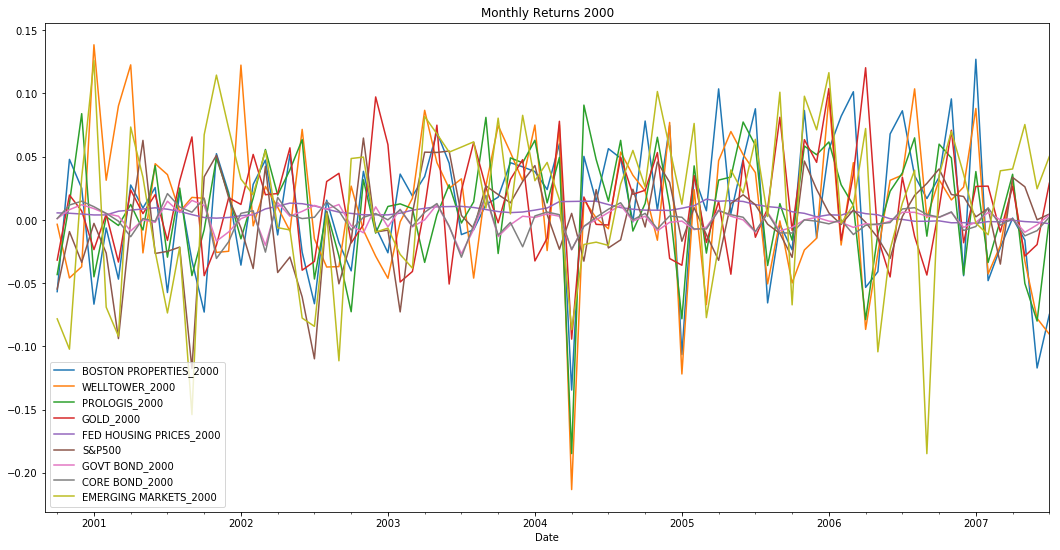

In [158]:
#Visualize the Monthly Return Relationships
monthly_returns_2000.plot(figsize=(18,9), title = 'Monthly Returns 2000')

In [46]:
#Visualize the Cumaltive Monthly Returns
cumulative_returns_2000 = (1 + monthly_returns_2000).cumprod()

In [47]:
#Plot 2000 Cumulative Returns
cumulative_rtns_2000 = cumulative_returns_2000.hvplot(title="Cumulative Returns 2000").opts(width=1200, height=400)
cumulative_rtns_2000

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## 2000 Asset Class Risk Analysis

In [48]:
#Calculate Monthly Standard Deviation of Each Asset Class
monthly_std_2000 = monthly_returns_2000.std()
print(monthly_std_2000 *100)

BOSTON PROPERTIES_2000     5.294020
WELLTOWER_2000             5.683482
PROLOGIS_2000              4.577576
GOLD_2000                  4.046985
FED HOUSING PRICES_2000    0.494906
S&P500                     3.597801
GOVT BOND_2000             0.854919
CORE BOND_2000             1.036627
EMERGING MARKETS_2000      6.362104
dtype: float64


In [53]:
#Visualize Using a Box PLot
monthly_rtns_2000 = monthly_returns_2000.hvplot.box(title = 'Portfolio Risk 2000').opts(width=1200, height=700)
monthly_rtns_2000

:BoxWhisker   [Variable]   (value)

In [54]:
# Determine which Asset Classes are riskier than the S&P 500
sp500_risk_2000 = monthly_returns_2000["S&P500"].std()
monthly_returns_2000.std() > sp500_risk_2000

BOSTON PROPERTIES_2000      True
WELLTOWER_2000              True
PROLOGIS_2000               True
GOLD_2000                   True
FED HOUSING PRICES_2000    False
S&P500                     False
GOVT BOND_2000             False
CORE BOND_2000             False
EMERGING MARKETS_2000       True
dtype: bool

In [55]:
#Sharpe Ratio Analysis
sharpe_ratios_2000 = ((monthly_returns_2000)) / ((monthly_std_2000))
print(sharpe_ratios_2000.mean())

BOSTON PROPERTIES_2000     0.208852
WELLTOWER_2000             0.185231
PROLOGIS_2000              0.230504
GOLD_2000                  0.289620
FED HOUSING PRICES_2000    1.298777
S&P500                    -0.031409
GOVT BOND_2000             0.032741
CORE BOND_2000             0.000108
EMERGING MARKETS_2000      0.206254
dtype: float64


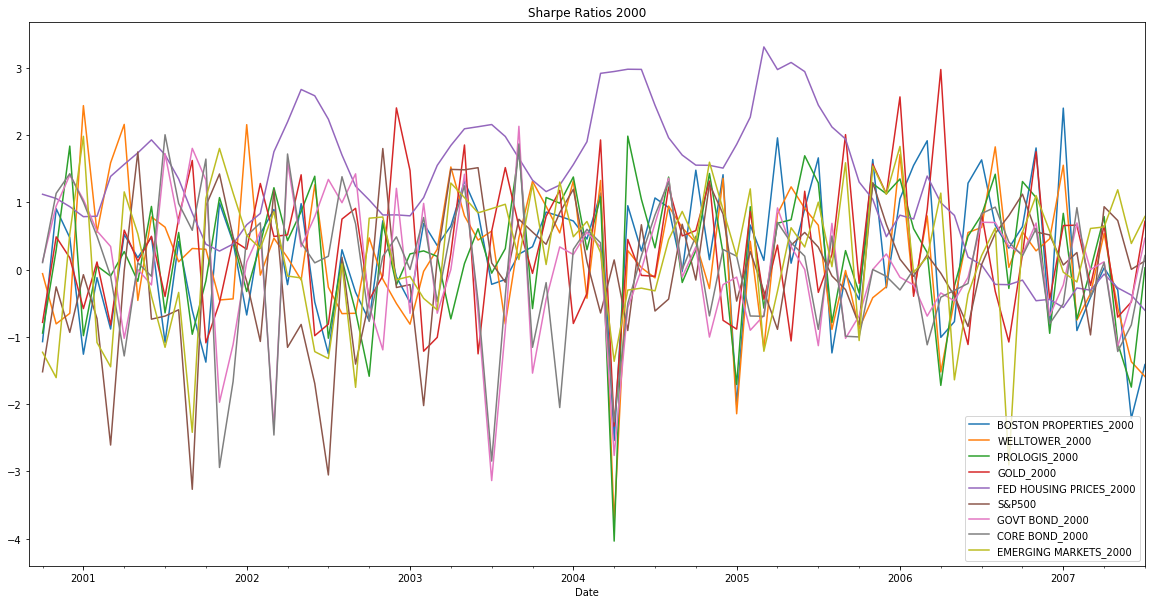

In [159]:
#Visualize Sharpe Ratios
sharpe_ratios_2000.plot(figsize= (20,10), title = 'Sharpe Ratios 2000')

In [57]:
#Determine on a Risk-Adjusted Basis (Sharpe), which Asset Classes provided a higher Risk-Adjusted-Return compared to Government Bonds
government_bonds_2000 = sharpe_ratios_2000["GOVT BOND_2000"].mean()
sharpe_ratios_2000.mean() > government_bonds_2000

BOSTON PROPERTIES_2000      True
WELLTOWER_2000              True
PROLOGIS_2000               True
GOLD_2000                   True
FED HOUSING PRICES_2000     True
S&P500                     False
GOVT BOND_2000             False
CORE BOND_2000             False
EMERGING MARKETS_2000       True
dtype: bool

## 2000 Covariance, Variance, and Beta Against the S&P500 Index


In [58]:
#Calculate Covariance for Asset Classes
BostonProperties_2000_cov = monthly_returns_2000['BOSTON PROPERTIES_2000'].cov(monthly_returns_2000['S&P500'])
Welltower_2000_cov = monthly_returns_2000['WELLTOWER_2000'].cov(monthly_returns_2000['S&P500'])
Prologis_2000_cov = monthly_returns_2000['PROLOGIS_2000'].cov(monthly_returns_2000['S&P500'])
Gold_2000_cov = monthly_returns_2000['GOLD_2000'].cov(monthly_returns_2000['S&P500'])
FedHousingPrices_2000_cov = monthly_returns_2000['FED HOUSING PRICES_2000'].cov(monthly_returns_2000['S&P500'])
SP500_2000_cov = monthly_returns_2000['S&P500'].cov(monthly_returns_2000['S&P500'])
CoreBond_2000_cov = monthly_returns_2000['CORE BOND_2000'].cov(monthly_returns_2000['S&P500'])
GovtBond_2000_cov = monthly_returns_2000['GOVT BOND_2000'].cov(monthly_returns_2000['S&P500'])
EmergingMarkets_2000_cov = monthly_returns_2000['EMERGING MARKETS_2000'].cov(monthly_returns_2000['S&P500'])

In [59]:
# Assemble Covariance in a Table
covariance_port_2000 = [BostonProperties_2000_cov, Welltower_2000_cov,Prologis_2000_cov, Gold_2000_cov, FedHousingPrices_2000_cov, SP500_2000_cov, CoreBond_2000_cov, GovtBond_2000_cov, EmergingMarkets_2000_cov]
print(covariance_port_2000)

[0.0005097784025833141, 0.00010433134485918277, 0.0003402282062756329, 7.213226703131001e-05, -2.53417755184354e-05, 0.001294417022736776, -7.830769689763546e-05, -0.00011131845111287634, 0.0013848288408199196]


In [60]:
#Create a DataFrame for Covariance
covariance_portfolio_2000 = {'ASSET CLASS': ['BostonProperties_2000_cov', 'Welltower_2000_cov', 'Prologis_2000_cov', 'Gold_2000_cov', 'FedHousingPrices_2000_cov', 'SP500_2000_cov', 'CoreBond_2000_cov', 'GovtBond_2000_cov', 'EmergingMarkets_2000_cov'],
        'COVARIANCE': [0.0005097784025833142, 0.00010433134485918273, 0.00034022820627563284, 7.213226703130998e-05, -2.5341775518435386e-05, 0.0012944170227367758, -7.830769689763546e-05, -0.0001113184511128763, 0.0013848288408199192]
        }
covariance_df_2000 = pd.DataFrame(covariance_portfolio_2000, columns = ['ASSET CLASS', 'COVARIANCE'])
covariance_df_2000_1 = covariance_df_2000.set_index('ASSET CLASS')

In [61]:
#Calculate Variance for Benchmark (S&P500 Index)
SP500_2000_var = monthly_returns_2000['S&P500'].var()

In [62]:
#Calculate Beta for Asset Classes 
BostonProperties_2000_beta = BostonProperties_2000_cov/SP500_2000_var
Welltower_2000_beta = Welltower_2000_cov/SP500_2000_var
Prologis_2000_beta = Prologis_2000_cov/SP500_2000_var
Gold_2000_beta = Gold_2000_cov/SP500_2000_var
FedHousingPrices_2000_beta = FedHousingPrices_2000_cov/SP500_2000_var
SP500_2000_beta = SP500_2000_cov/SP500_2000_var
CoreBond_2000_beta = CoreBond_2000_cov/SP500_2000_var
GovtBond_2000_beta = GovtBond_2000_cov/SP500_2000_var
EmergingMarkets_2000_beta = EmergingMarkets_2000_cov/SP500_2000_var

In [63]:
#Assemble Beta in a Table
beta_port_2000 = [BostonProperties_2000_beta,Welltower_2000_beta,Prologis_2000_beta, Gold_2000_beta, FedHousingPrices_2000_beta, SP500_2000_beta , CoreBond_2000_beta, GovtBond_2000_beta, EmergingMarkets_2000_beta]
print(beta_port_2000)

[0.3938285680958471, 0.08060102967326233, 0.2628428090016083, 0.05572567863701398, -0.01957775204845149, 0.9999999999999998, -0.06049649805444468, -0.0859989085105792, 1.06984751938134]


In [64]:
#Create a DataFrame for Beta
beta_portfolio_2000 = {'ASSET CLASS': ['BostonProperties_2000_beta', 'Welltower_2000_beta', 'Prologis_2000_beta', 'Gold_2000_beta', 'FedHousingPrices_2000_beta', 'SP500_2000_beta' , 'CoreBond_2000_beta', 'GovtBond_2000_beta', 'EmergingMarkets_2000_beta'],
        'BETA': [0.3938285680958472, 0.0806010296732623, 0.2628428090016082, 0.055725678637013956, -0.01957775204845148, 0.9999999999999997, -0.06049649805444468, -0.08599890851057918, 1.0698475193813397]
        }
beta_df_2000 = pd.DataFrame(beta_portfolio_2000, columns = ['ASSET CLASS','BETA'])
beta_df_2000_1 = beta_df_2000.set_index('ASSET CLASS')

## 2000 Covariance

In [65]:
#Covariance Head
covariance_df_2000_1.head(9)

,COVARIANCE
ASSET CLASS,
BostonProperties_2000_cov,0.000510
Welltower_2000_cov,0.000104
Prologis_2000_cov,0.000340
Gold_2000_cov,0.000072
FedHousingPrices_2000_cov,-0.000025
SP500_2000_cov,0.001294
CoreBond_2000_cov,-0.000078
GovtBond_2000_cov,-0.000111
EmergingMarkets_2000_cov,0.001385


## 2000 Beta

In [66]:
#Beta Head
beta_df_2000_1.head(9)

,BETA
ASSET CLASS,
BostonProperties_2000_beta,0.393829
Welltower_2000_beta,0.080601
Prologis_2000_beta,0.262843
Gold_2000_beta,0.055726
FedHousingPrices_2000_beta,-0.019578
SP500_2000_beta,1.000000
CoreBond_2000_beta,-0.060496
GovtBond_2000_beta,-0.085999
EmergingMarkets_2000_beta,1.069848


In [67]:
#Plot Beta for 2000 
beta_2000_plot = beta_df_2000_1.hvplot(kind='bar', title = '2000 Asset Class Beta').opts(width=1500, height=700)
beta_2000_plot

:Bars   [ASSET CLASS]   (BETA)

# II. 2007 Analysis

## 2007 Recession Checking, Cleaning, and Concatenating Data

In [68]:
#Check S&P Data Head
sp500_2007.head()

,S&P500
Date,
2007-03-01,1766.27
2007-04-01,1825.58
2007-05-01,1873.38
2007-06-01,1873.53
2007-07-01,1882.08


In [69]:
#Check S&P Data Tail
sp500_2007.tail()

,S&P500
Date,
2013-11-01,1972.77
2013-12-01,1999.75
2014-01-01,2008.41
2014-02-01,1995.17
2014-03-01,2033.11


In [70]:
#Check PNIGX Data Head
PNGR2_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,10.20,10.23,10.20,10.20,6.675200,0
2007-04-01,10.20,10.21,10.17,10.21,6.706075,0
2007-05-01,10.20,10.20,10.11,10.11,6.665246,0
2007-06-01,10.09,10.10,10.01,10.07,6.664559,0
2007-07-01,10.08,10.12,10.02,10.11,6.717097,0


In [71]:
#Check PNIGX Data Head
PNGR2_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,10.51,10.59,10.47,10.58,8.942428,0
2013-11-01,10.55,10.56,10.48,10.51,8.898401,0
2013-12-01,10.48,10.48,10.35,10.35,8.776296,0
2014-01-01,10.36,10.49,10.36,10.49,8.961164,0
2014-02-01,10.54,10.54,10.45,10.51,8.995419,0


In [72]:
#Drop PNGR Extra Columns
PNGR2_df = PNGR2_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PNGR2_df.head()

,Close
Date,
2007-03-01,10.20
2007-04-01,10.21
2007-05-01,10.11
2007-06-01,10.07
2007-07-01,10.11


In [73]:
#Rename BOND_PNIGX 'Close' to 'Bond Price'
PNGR2_price = PNGR2_df.rename(columns={
    "Date": "Date", "Close": "GOVT BOND_2007"})
PNGR2_price.head()

,GOVT BOND_2007
Date,
2007-03-01,10.20
2007-04-01,10.21
2007-05-01,10.11
2007-06-01,10.07
2007-07-01,10.11


In [74]:
#Check BXP Head
BXPR2_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,118.000000,120.510002,113.160004,117.400002,71.803688,24263000
2007-04-01,117.410004,119.949997,114.779999,117.559998,72.326347,16537700
2007-05-01,117.709999,118.000000,106.410004,115.680000,71.169739,25649800
2007-06-01,115.680000,118.000000,97.940002,102.129997,62.833351,28620300
2007-07-01,102.459999,108.250000,92.190002,94.489998,58.530727,25653600


In [75]:
#Check BXP Tail
BXPR2_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,107.059998,109.830002,102.879997,103.500000,81.424248,21306100
2013-11-01,103.959999,104.989998,98.709999,99.489998,78.269562,15039900
2013-12-01,99.849998,105.220001,98.040001,100.370003,78.961861,19229300
2014-01-01,100.220001,108.629997,99.550003,108.089996,87.474426,18354700
2014-02-01,107.930000,112.959999,105.820000,112.430000,90.986694,14227400


In [76]:
#Drop BXPR Extra Columns
BXPR2_df = BXPR2_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BXPR2_df.head()

,Close
Date,
2007-03-01,117.400002
2007-04-01,117.559998
2007-05-01,115.680000
2007-06-01,102.129997
2007-07-01,94.489998


In [77]:
#Rename BXP 'Close' to 'BXP Price'
BXPR2_price = BXPR2_df.rename(columns={
    "Date": "Date", "Close": "BOSTON PROPERTIES_2007"})
BXPR2_price.head()

,BOSTON PROPERTIES_2007
Date,
2007-03-01,117.400002
2007-04-01,117.559998
2007-05-01,115.680000
2007-06-01,102.129997
2007-07-01,94.489998


In [78]:
#Check GCR Head
GCR2_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,673.000000,673.000000,640.000000,663.000000,663.000000,52996
2007-04-01,665.500000,692.500000,656.099976,680.500000,680.500000,4436
2007-05-01,673.700012,688.000000,651.000000,661.000000,661.000000,158741
2007-06-01,661.500000,674.000000,640.000000,648.099976,648.099976,4027
2007-07-01,656.799988,684.200012,648.400024,666.900024,666.900024,138110


In [79]:
#Check GCR Head
GCR2_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,1328.000000,1359.699951,1254.099976,1323.599976,1323.599976,2723
2013-11-01,1325.699951,1325.699951,1229.000000,1250.599976,1250.599976,270667
2013-12-01,1251.400024,1267.000000,1182.000000,1201.900024,1201.900024,14554
2014-01-01,1204.300049,1269.400024,1204.300049,1240.099976,1240.099976,189701
2014-02-01,1242.400024,1343.900024,1241.199951,1321.400024,1321.400024,11943


In [80]:
#Drop GCR Extra Columns
GCR2_df = GCR2_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
GCR2_df.head()

,Close
Date,
2007-03-01,663.000000
2007-04-01,680.500000
2007-05-01,661.000000
2007-06-01,648.099976
2007-07-01,666.900024


In [81]:
#Rename GCR Columns
GCR2_price = GCR2_df.rename(columns={
    "Date": "Date", "Close": "GOLD_2007"})
GCR2_price.head()

,GOLD_2007
Date,
2007-03-01,663.000000
2007-04-01,680.500000
2007-05-01,661.000000
2007-06-01,648.099976
2007-07-01,666.900024


In [82]:
#Check HPR Head
HPR2_df.head()

,Price
Date,
2007-03-01,182.196
2007-04-01,182.134
2007-05-01,181.888
2007-06-01,181.545
2007-07-01,181.000


In [83]:
#Check HPR Tail
HPR2_df.tail()

,Price
Date,
2013-11-01,159.361
2013-12-01,159.282
2014-01-01,159.380
2014-02-01,159.891
2014-03-01,161.210


In [84]:
#Rename HPR Columns
HPR2_price = HPR2_df.rename(columns={
    "Date": "Date", "Price": "FED HOUSING PRICES_2007"})
HPR2_price.head()

,FED HOUSING PRICES_2007
Date,
2007-03-01,182.196
2007-04-01,182.134
2007-05-01,181.888
2007-06-01,181.545
2007-07-01,181.000


In [85]:
#Check PLD Head
PLDR2_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,57.770000,60.869999,56.209999,58.790001,36.729988,22525100
2007-04-01,58.790001,62.830002,58.669998,60.910000,38.054497,13907400
2007-05-01,61.000000,61.709999,54.380001,57.849998,36.449158,14795300
2007-06-01,57.919998,59.779999,51.529999,53.220001,33.531956,15624000
2007-07-01,55.200001,57.209999,52.130001,53.279999,33.569748,20184500


In [86]:
#Check PLD Head
PLDR2_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,37.779999,40.990002,37.310001,39.950001,32.278152,57958800
2013-11-01,40.110001,40.889999,37.910000,37.930000,30.646053,37049200
2013-12-01,37.919998,38.080002,35.709999,36.950001,29.854256,50158800
2014-01-01,36.990002,39.160000,36.330002,38.759998,31.560184,53599800
2014-02-01,38.820000,41.389999,38.009998,41.189999,33.538803,45840200


In [87]:
#Drop PLDR Extra Columns
PLDR2_df = PLDR2_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PLDR2_df.head()

,Close
Date,
2007-03-01,58.790001
2007-04-01,60.910000
2007-05-01,57.849998
2007-06-01,53.220001
2007-07-01,53.279999


In [88]:
#Rename PLDR Columns
PLDR2_price = PLDR2_df.rename(columns={
    "Date": "Date", "Close": "PROLOGIS_2007"})
PLDR2_price.head()

,PROLOGIS_2007
Date,
2007-03-01,58.790001
2007-04-01,60.910000
2007-05-01,57.849998
2007-06-01,53.220001
2007-07-01,53.279999


In [89]:
#Check Well Head
WELLR2_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,44.810001,45.779999,42.630001,43.900002,21.475824,13075300
2007-04-01,43.900002,45.799999,43.130001,45.240002,22.131353,13722000
2007-05-01,45.240002,45.500000,42.060001,43.770000,21.412224,19442600
2007-06-01,43.799999,44.099998,38.639999,40.360001,20.039820,12642200
2007-07-01,40.650002,42.369999,35.869999,36.709999,18.227501,19770300


In [90]:
#Check Well Head
WELLR2_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,62.380001,66.760002,61.279999,64.849998,46.374115,37227200
2013-11-01,64.900002,65.400002,0.220000,55.990002,40.038349,35392600
2013-12-01,56.160000,56.240002,0.220000,53.570000,38.776649,43549000
2014-01-01,0.220000,58.110001,0.220000,57.919998,41.925404,50725700
2014-02-01,57.820000,59.080002,0.050000,58.740002,42.518963,33990100


In [91]:
#Drop WELL Extra Columns
WELLR2_df = WELLR2_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
WELLR2_df.head()

,Close
Date,
2007-03-01,43.900002
2007-04-01,45.240002
2007-05-01,43.770000
2007-06-01,40.360001
2007-07-01,36.709999


In [92]:
#Rename WELLR Columns
WELLR2_price = WELLR2_df.rename(columns={
    "Date": "Date", "Close": "WELLTOWER_2007"})
WELLR2_price.head()

,WELLTOWER_2007
Date,
2007-03-01,43.900002
2007-04-01,45.240002
2007-05-01,43.770000
2007-06-01,40.360001
2007-07-01,36.709999


In [93]:
#Check MAD Head
MADR2_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,23.190001,24.350000,22.020000,24.350000,14.539431,0
2007-04-01,24.430000,25.940001,24.430000,25.330000,15.124589,0
2007-05-01,25.309999,27.240000,25.309999,27.240000,16.265057,0
2007-06-01,27.719999,28.370001,26.709999,27.910000,16.665112,0
2007-07-01,28.540001,31.139999,28.540001,29.309999,17.501053,0


In [94]:
#Check MAD Tail
MADR2_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,19.410000,20.490000,19.410000,20.100000,18.612785,0
2013-11-01,20.120001,20.120001,19.340000,20.100000,18.612785,0
2013-12-01,20.030001,20.059999,19.520000,19.930000,18.455360,0
2014-01-01,19.620001,19.620001,18.459999,18.490000,17.217218,0
2014-02-01,18.120001,19.299999,18.120001,19.299999,17.971460,0


In [95]:
#Drop MAD Extra Columns
MADR2_df = MADR2_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
MADR2_df.head()

,Close
Date,
2007-03-01,24.350000
2007-04-01,25.330000
2007-05-01,27.240000
2007-06-01,27.910000
2007-07-01,29.309999


In [96]:
#Rename MADR Columns
MADR2_price = MADR2_df.rename(columns={
    "Date": "Date", "Close": "EMERGING MARKETS_2007"})
MADR2_price.head()

,EMERGING MARKETS_2007
Date,
2007-03-01,24.350000
2007-04-01,25.330000
2007-05-01,27.240000
2007-06-01,27.910000
2007-07-01,29.309999


In [97]:
#Check BFM Head
BFMR2_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,9.53,9.55,9.49,9.49,5.859001,0
2007-04-01,9.50,9.51,9.45,9.50,5.888106,0
2007-05-01,9.49,9.50,9.38,9.38,5.835916,0
2007-06-01,9.36,9.37,9.20,9.30,5.808410,0
2007-07-01,9.31,9.33,9.23,9.32,5.843599,0


In [98]:
#Check BFM Tail
BFMR2_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,9.44,9.52,9.42,9.51,7.920578,0
2013-11-01,9.48,9.49,9.42,9.45,7.888857,0
2013-12-01,9.43,9.44,9.39,9.39,7.857894,0
2014-01-01,9.40,9.52,9.40,9.52,7.987057,0
2014-02-01,9.55,9.55,9.48,9.55,8.034187,0


In [99]:
#Drop BFMR Extra Columns
BFMR2_df = BFMR2_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BFMR2_df.head()

,Close
Date,
2007-03-01,9.49
2007-04-01,9.50
2007-05-01,9.38
2007-06-01,9.30
2007-07-01,9.32


In [100]:
#Rename BFMR Columns
BFMR2_price = BFMR2_df.rename(columns={
    "Date": "Date", "Close": "CORE BOND_2007"})
BFMR2_price.head()

,CORE BOND_2007
Date,
2007-03-01,9.49
2007-04-01,9.50
2007-05-01,9.38
2007-06-01,9.30
2007-07-01,9.32


In [101]:
#Concat Cleaned Data Frames
combined_port_2007 = pd.concat([BXPR2_price, PLDR2_price, WELLR2_price, GCR2_price, HPR2_price, sp500_2007, PNGR2_price, BFMR2_price, MADR2_price],axis="columns", join="inner")
combined_port_2007.head()

,BOSTON PROPERTIES_2007,PROLOGIS_2007,WELLTOWER_2007,GOLD_2007,FED HOUSING PRICES_2007,S&P500,GOVT BOND_2007,CORE BOND_2007,EMERGING MARKETS_2007
Date,,,,,,,,,
2007-03-01,117.400002,58.790001,43.900002,663.000000,182.196,1766.27,10.20,9.49,24.350000
2007-04-01,117.559998,60.910000,45.240002,680.500000,182.134,1825.58,10.21,9.50,25.330000
2007-05-01,115.680000,57.849998,43.770000,661.000000,181.888,1873.38,10.11,9.38,27.240000
2007-06-01,102.129997,53.220001,40.360001,648.099976,181.545,1873.53,10.07,9.30,27.910000
2007-07-01,94.489998,53.279999,36.709999,666.900024,181.000,1882.08,10.11,9.32,29.309999


# 2007 Recession Statistical Analyses

## 2007 Asset Class Returns

In [102]:
#Calculate Monthly Returns from Asset Classes
monthly_returns_2007 = combined_port_2007.pct_change()
monthly_returns_2007.head(10)

,BOSTON PROPERTIES_2007,PROLOGIS_2007,WELLTOWER_2007,GOLD_2007,FED HOUSING PRICES_2007,S&P500,GOVT BOND_2007,CORE BOND_2007,EMERGING MARKETS_2007
Date,,,,,,,,,
2007-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-01,0.001363,0.036061,0.030524,0.026395,-0.000340,0.033579,0.000980,0.001054,0.040246
2007-05-01,-0.015992,-0.050238,-0.032493,-0.028655,-0.001351,0.026183,-0.009794,-0.012632,0.075405
2007-06-01,-0.117133,-0.080035,-0.077907,-0.019516,-0.001886,0.000080,-0.003956,-0.008529,0.024596
2007-07-01,-0.074807,0.001127,-0.090436,0.029008,-0.003002,0.004564,0.003972,0.002151,0.050161
2007-08-01,0.059054,0.031907,0.086897,0.009147,-0.004188,-0.041704,0.006924,0.007511,-0.036847
2007-09-01,0.038273,0.087850,0.108772,0.103715,-0.006175,0.026386,0.004912,0.007455,-0.035069
2007-10-01,0.042733,0.092627,0.001130,0.066236,-0.008887,0.026221,0.002933,0.003171,0.128488
2007-11-01,-0.091564,-0.064116,0.011741,-0.012374,-0.013344,-0.055150,0.015595,0.010537,-0.078074


In [103]:
#Print the Average Monthly Returns (by a percentage basis)
print(monthly_returns_2007.mean()*100)

BOSTON PROPERTIES_2007     0.328742
PROLOGIS_2007              0.347798
WELLTOWER_2007             0.590778
GOLD_2007                  1.020411
FED HOUSING PRICES_2007   -0.152208
S&P500                     0.243520
GOVT BOND_2007             0.040614
CORE BOND_2007             0.015861
EMERGING MARKETS_2007      0.063638
dtype: float64


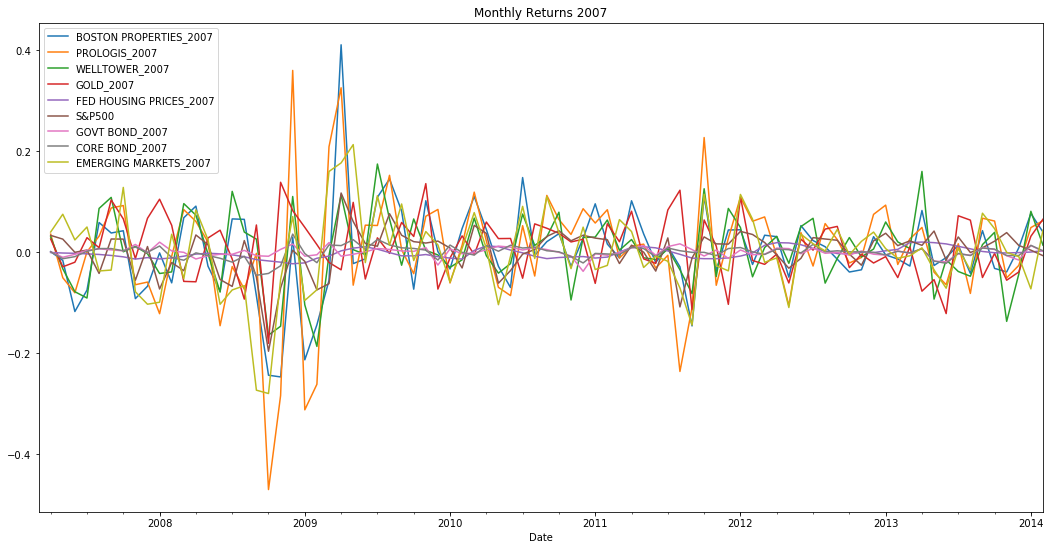

In [161]:
#Visualize the Monthly Return Relationships
monthly_returns_2007.plot(figsize=(18,9), title = 'Monthly Returns 2007')

In [105]:
#Visualize the Cumaltive Monthly Returns
cumulative_returns_2007 = (1 + monthly_returns_2007).cumprod()

In [106]:
#Plot 2007 Cumulative Returns
cumulative_rtns_2007 = cumulative_returns_2007.hvplot(title="Cumulative Returns 2007").opts(width=1200, height=400)
cumulative_rtns_2007



:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## 2007 Asset Class Risk Analysis

In [107]:
#Calculate Monthly Standard Deviation of Each Asset Class
monthly_std_2007 = monthly_returns_2007.std()
print(monthly_std_2007 *100)

BOSTON PROPERTIES_2007      8.815914
PROLOGIS_2007              11.919268
WELLTOWER_2007              6.922118
GOLD_2007                   6.111716
FED HOUSING PRICES_2007     1.007122
S&P500                      4.326827
GOVT BOND_2007              0.955872
CORE BOND_2007              1.289352
EMERGING MARKETS_2007       8.153535
dtype: float64


In [110]:
#Visualize Using a Box PLot
monthly_rtns_2007 = monthly_returns_2007.hvplot.box(title = 'Portfolio Risk 2007').opts(width=1200, height=700)
monthly_rtns_2007

:BoxWhisker   [Variable]   (value)

In [111]:
# Determine which Asset Classes are riskier than the S&P 500
sp500_risk_2007 = monthly_returns_2007["S&P500"].std()
monthly_returns_2007.std() > sp500_risk_2007

BOSTON PROPERTIES_2007      True
PROLOGIS_2007               True
WELLTOWER_2007              True
GOLD_2007                   True
FED HOUSING PRICES_2007    False
S&P500                     False
GOVT BOND_2007             False
CORE BOND_2007             False
EMERGING MARKETS_2007       True
dtype: bool

In [112]:
#Sharpe Ratio Analysis
sharpe_ratios_2007 = ((monthly_returns_2007)) / ((monthly_std_2007))
print(sharpe_ratios_2007.mean())

BOSTON PROPERTIES_2007     0.037290
PROLOGIS_2007              0.029180
WELLTOWER_2007             0.085346
GOLD_2007                  0.166960
FED HOUSING PRICES_2007   -0.151132
S&P500                     0.056282
GOVT BOND_2007             0.042489
CORE BOND_2007             0.012302
EMERGING MARKETS_2007      0.007805
dtype: float64


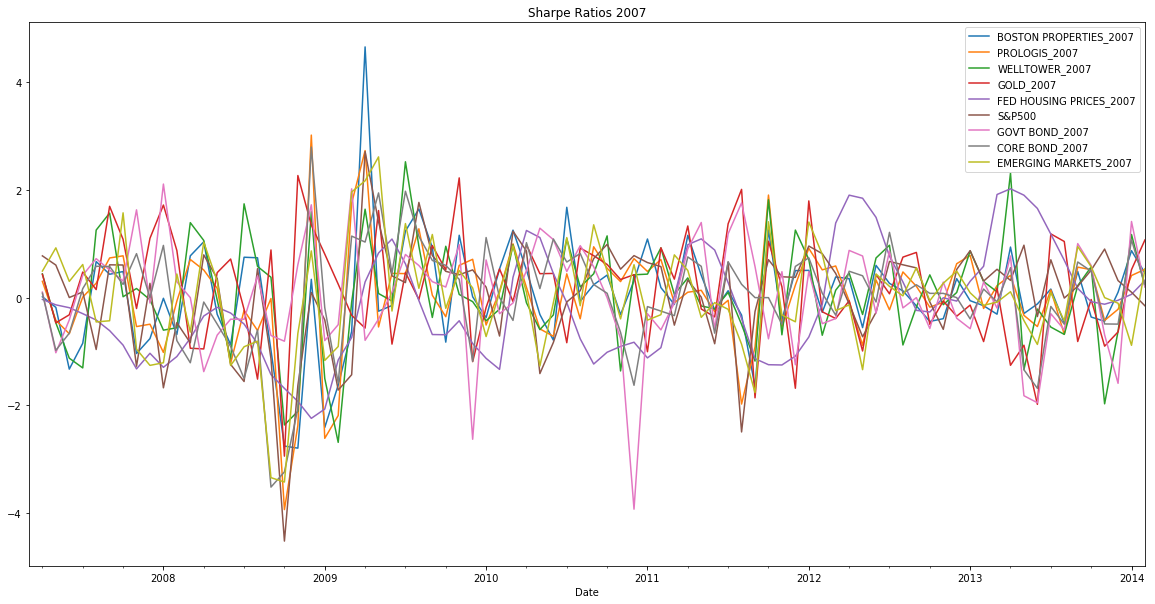

In [157]:
#Visualize Sharpe Ratios
sharpe_ratios_2007.plot(figsize= (20,10), title = 'Sharpe Ratios 2007')

In [114]:
#Determine on a Risk-Adjusted Basis (Sharpe), which Asset Classes provided a higher Risk-Adjusted-Return compared to Government Bonds
government_bonds_2007 = sharpe_ratios_2007["GOVT BOND_2007"].mean()
sharpe_ratios_2007.mean() > government_bonds_2007

BOSTON PROPERTIES_2007     False
PROLOGIS_2007              False
WELLTOWER_2007              True
GOLD_2007                   True
FED HOUSING PRICES_2007    False
S&P500                      True
GOVT BOND_2007             False
CORE BOND_2007             False
EMERGING MARKETS_2007      False
dtype: bool

## 2007 Covariance, Variance, and Beta Against the S&P500 Index

In [115]:
#Calculate Covariance for Asset Classes
BostonProperties_2007_cov = monthly_returns_2007['BOSTON PROPERTIES_2007'].cov(monthly_returns_2007['S&P500'])
Welltower_2007_cov = monthly_returns_2007['WELLTOWER_2007'].cov(monthly_returns_2007['S&P500'])
Prologis_2007_cov = monthly_returns_2007['PROLOGIS_2007'].cov(monthly_returns_2007['S&P500'])
Gold_2007_cov = monthly_returns_2007['GOLD_2007'].cov(monthly_returns_2007['S&P500'])
FedHousingPrices_2007_cov = monthly_returns_2007['FED HOUSING PRICES_2007'].cov(monthly_returns_2007['S&P500'])
SP500_2007_cov = monthly_returns_2007['S&P500'].cov(monthly_returns_2007['S&P500'])
CoreBond_2007_cov = monthly_returns_2007['CORE BOND_2007'].cov(monthly_returns_2007['S&P500'])
GovtBond_2007_cov = monthly_returns_2007['GOVT BOND_2007'].cov(monthly_returns_2007['S&P500'])
EmergingMarkets_2007_cov = monthly_returns_2007['EMERGING MARKETS_2007'].cov(monthly_returns_2007['S&P500'])

In [116]:
# Assemble Covariance in a Table
covariance_port_2007 = [BostonProperties_2007_cov, Welltower_2007_cov,Prologis_2007_cov, Gold_2007_cov, FedHousingPrices_2007_cov, SP500_2007_cov, CoreBond_2007_cov, GovtBond_2007_cov, EmergingMarkets_2007_cov]
print(covariance_port_2007)

[0.002241741618926788, 0.0011533795385915235, 0.0033766709404947914, 0.0002223506645648936, 0.00010519194604968201, 0.0018721427622387266, 0.00021740544131501938, -9.412154224311337e-05, 0.002174875324360159]


In [117]:
#Create a DataFrame for Covariance
covariance_portfolio_2007 = {'ASSET CLASS': ['BostonProperties_2007_cov', 'Welltower_2007_cov', 'Prologis_2007_cov', 'Gold_2007_cov', 'FedHousingPrices_2007_cov', 'SP500_2007_cov', 'CoreBond_2007_cov', 'GovtBond_2007_cov', 'EmergingMarkets_2007_cov'],
        'COVARIANCE':[0.0022417416189267876, 0.0011533795385915233, 0.0033766709404947914, 0.00022235066456489347, 0.00010519194604968201, 0.0018721427622387249, 0.00021740544131501946, -9.412154224311337e-05, 0.002174875324360161]
        }
covariance_df_2007 = pd.DataFrame(covariance_portfolio_2007, columns = ['ASSET CLASS', 'COVARIANCE'])
covariance_df_2007_1 = covariance_df_2007.set_index('ASSET CLASS')

In [118]:
#Calculate Variance for Benchmark (S&P500 Index)
SP500_2007_var = monthly_returns_2007['S&P500'].var()

In [119]:
#Calculate Beta for Asset Classes 
BostonProperties_2007_beta = BostonProperties_2007_cov/SP500_2007_var
Welltower_2007_beta = Welltower_2007_cov/SP500_2007_var
Prologis_2007_beta = Prologis_2007_cov/SP500_2007_var
Gold_2007_beta = Gold_2007_cov/SP500_2007_var
FedHousingPrices_2007_beta = FedHousingPrices_2007_cov/SP500_2007_var
SP500_2007_beta = SP500_2007_cov/SP500_2007_var
CoreBond_2007_beta = CoreBond_2007_cov/SP500_2007_var
GovtBond_2007_beta = GovtBond_2007_cov/SP500_2007_var
EmergingMarkets_2007_beta = EmergingMarkets_2007_cov/SP500_2007_var

In [120]:
#Assemble Beta in a Table
beta_port_2007 = [BostonProperties_2007_beta,Welltower_2007_beta,Prologis_2007_beta, Gold_2007_beta, FedHousingPrices_2007_beta, SP500_2007_beta , CoreBond_2007_beta, GovtBond_2000_beta, EmergingMarkets_2000_beta]
print(beta_port_2007)

[1.1974202310544373, 0.6160745653885398, 1.8036396628518523, 0.11876800693287116, 0.0561879938706664, 1.0000000000000002, 0.11612652929044999, -0.0859989085105792, 1.06984751938134]


In [121]:
#Create a DataFrame for Beta
beta_portfolio_2007 = {'ASSET CLASS': ['BostonProperties_2007_beta', 'Welltower_2007_beta', 'Prologis_2007_beta', 'Gold_2007_beta', 'FedHousingPrices_2007_beta', 'SP500_2007_beta' , 'CoreBond_2007_beta', 'GovtBond_2007_beta', 'EmergingMarkets_2007_beta'],
        'BETA': [1.197420231054437, 0.6160745653885397, 1.8036396628518523, 0.1187680069328711, 0.0561879938706664, 0.9999999999999993, 0.11612652929045003, -0.08599890851057918, 1.0698475193813397]
        }
beta_df_2007 = pd.DataFrame(beta_portfolio_2007, columns = ['ASSET CLASS','BETA'])
beta_df_2007_1 = beta_df_2007.set_index('ASSET CLASS')

## 2007 Covariance

In [122]:
covariance_df_2007_1.head(9)

,COVARIANCE
ASSET CLASS,
BostonProperties_2007_cov,0.002242
Welltower_2007_cov,0.001153
Prologis_2007_cov,0.003377
Gold_2007_cov,0.000222
FedHousingPrices_2007_cov,0.000105
SP500_2007_cov,0.001872
CoreBond_2007_cov,0.000217
GovtBond_2007_cov,-0.000094
EmergingMarkets_2007_cov,0.002175


## 2007 Beta

In [123]:
beta_df_2007_1.head(9)

,BETA
ASSET CLASS,
BostonProperties_2007_beta,1.197420
Welltower_2007_beta,0.616075
Prologis_2007_beta,1.803640
Gold_2007_beta,0.118768
FedHousingPrices_2007_beta,0.056188
SP500_2007_beta,1.000000
CoreBond_2007_beta,0.116127
GovtBond_2007_beta,-0.085999
EmergingMarkets_2007_beta,1.069848


In [124]:
#Beta for 2007 Portfolio
beta_2007_plot = beta_df_2007_1.hvplot(kind='bar', title = '2007 Asset Class Beta').opts(width=1500, height=700)
beta_2007_plot

:Bars   [ASSET CLASS]   (BETA)

# III. 2020 Future Forecasting Analysis

## 2020 CSVs Checking, Cleaning, and Concatenating Data

In [125]:
# Check MAD Head
MADR3_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,19.620001,19.620001,18.459999,18.490000,17.217218,0
2014-02-01,18.120001,19.299999,18.120001,19.299999,17.971460,0
2014-03-01,18.920000,19.469999,18.490000,19.469999,18.129759,0
2014-04-01,19.719999,19.900000,19.330000,19.440001,18.101826,0
2014-05-01,19.469999,20.270000,19.469999,20.139999,18.753639,0


In [126]:
# Check MAD Tail
MADR3_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,23.280001,23.280001,21.990000,22.889999,22.448858,0
2019-09-01,22.719999,23.799999,22.719999,23.290001,22.841150,0
2019-10-01,23.129999,24.590000,22.950001,24.510000,24.037638,0
2019-11-01,24.809999,25.330000,24.610001,24.629999,24.155323,0
2019-12-01,24.549999,26.030001,24.440001,25.940001,25.440077,0


In [127]:
# Drop MAD Columns
MADR3_df = MADR3_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
MADR3_df.head()

,Close
Date,
2014-01-01,18.490000
2014-02-01,19.299999
2014-03-01,19.469999
2014-04-01,19.440001
2014-05-01,20.139999


In [128]:
# Rename MADR Columns
MADR3_price = MADR3_df.rename(columns={
    "Date": "Date", "Close": "EMERGING MARKETS_2014"})
MADR3_price.head()

,EMERGING MARKETS_2014
Date,
2014-01-01,18.490000
2014-02-01,19.299999
2014-03-01,19.469999
2014-04-01,19.440001
2014-05-01,20.139999


In [129]:
# Check GCR Head
GCR3_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,1204.300049,1269.400024,1204.300049,1240.099976,1240.099976,189701
2014-02-01,1242.400024,1343.900024,1241.199951,1321.400024,1321.400024,11943
2014-03-01,1335.900024,1391.400024,1282.400024,1283.400024,1283.400024,255794
2014-04-01,1285.099976,1330.000000,1272.400024,1295.599976,1295.599976,8265
2014-05-01,1288.699951,1314.199951,1241.800049,1245.599976,1245.599976,211143


In [130]:
# Check GCR Tail
GCR3_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,1411.300049,1549.300049,1400.900024,1519.099976,1519.099976,17142
2019-09-01,1535.199951,1566.199951,1463.500000,1465.699951,1465.699951,4181273676
2019-10-01,1468.699951,1518.199951,1458.300049,1511.400024,1511.400024,5233
2019-11-01,1511.000000,1511.599976,1447.099976,1465.599976,1465.599976,443701
2019-12-01,1462.800049,1529.000000,1453.300049,1520.000000,1520.000000,120952773


In [131]:
# Drop GCR Columns
GCR3_df = GCR3_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
GCR3_df.head()

,Close
Date,
2014-01-01,1240.099976
2014-02-01,1321.400024
2014-03-01,1283.400024
2014-04-01,1295.599976
2014-05-01,1245.599976


In [132]:
# Rename GCR Columns
GCR3_df = GCR3_df.rename(columns={
    "Date": "Date", "Close": "GOLD_2014"})
GCR3_df.head()

,GOLD_2014
Date,
2014-01-01,1240.099976
2014-02-01,1321.400024
2014-03-01,1283.400024
2014-04-01,1295.599976
2014-05-01,1245.599976


In [133]:
#Concat Cleaned Data Frames
combined_port_2014 = pd.concat([GCR3_df, MADR3_price],axis="columns", join="inner")
combined_port_2014.head()

,GOLD_2014,EMERGING MARKETS_2014
Date,,
2014-01-01,1240.099976,18.490000
2014-02-01,1321.400024,19.299999
2014-03-01,1283.400024,19.469999
2014-04-01,1295.599976,19.440001
2014-05-01,1245.599976,20.139999


In [134]:
#2014 Portfolio (Gold/Emerging Markets) Return
monthly_returns_2014 = combined_port_2014.pct_change()
monthly_returns_2014.head()

,GOLD_2014,EMERGING MARKETS_2014
Date,,
2014-01-01,NaN,NaN
2014-02-01,0.065559,0.043807
2014-03-01,-0.028757,0.008808
2014-04-01,0.009506,-0.001541
2014-05-01,-0.038592,0.036008


In [162]:
 #Calculate Monthly Standard Deviation of Each Asset Class
monthly_std_2014 = monthly_returns_2014.std()
print(monthly_std_2014 *100)

GOLD_2014                3.823043
EMERGING MARKETS_2014    4.323391
dtype: float64


In [163]:
#Calculate Monthly Returns from Asset Classes
monthly_returns_2014 = combined_port_2014.pct_change()
monthly_returns_2014.head()

,GOLD_2014,EMERGING MARKETS_2014
Date,,
2014-01-01,NaN,NaN
2014-02-01,0.065559,0.043807
2014-03-01,-0.028757,0.008808
2014-04-01,0.009506,-0.001541
2014-05-01,-0.038592,0.036008


In [164]:
#Print the Average Monthly Returns
print(monthly_returns_2014.mean()*100)

GOLD_2014                0.358408
EMERGING MARKETS_2014    0.569849
dtype: float64


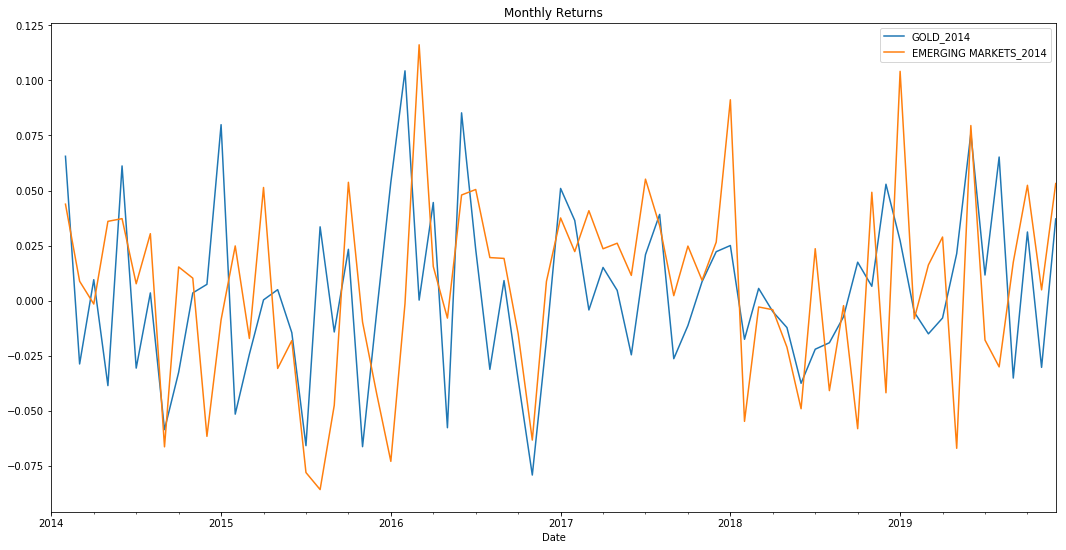

In [165]:
#Visualize the Monthly Return Relationships
monthly_returns_2014.plot(figsize=(18,9), title = 'Monthly Returns')

In [166]:
#Visualize the Cumaltive Monthly Returns
cumulative_returns_2014 = (1 + monthly_returns_2014).cumprod()

In [167]:
#Plot 2014 Cumulative Returns
cumulative_rtns_2014 = cumulative_returns_2014.hvplot(title="Cumulative Returns 2014").opts(width=1200, height=400)
cumulative_rtns_2014

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## 2014 Monte Carlo Simulation 

In [135]:
#Daily Returns Mean
avg_monthly_return_gold_2014 = monthly_returns_2014.mean()['GOLD_2014']
avg_montly_return_em_2014 = monthly_returns_2014.mean()['EMERGING MARKETS_2014']
print(avg_monthly_return_gold_2014, avg_montly_return_em_2014)

0.0035840786848430717 0.005698485769527984


In [136]:
# Compute daily volatility
montly_volatility = monthly_returns_2014.std()
monthly_vol_gold = montly_volatility['GOLD_2014']
montly_vol_em = montly_volatility['EMERGING MARKETS_2014']
print(monthly_vol_gold, montly_vol_em)

0.038230426103933825 0.04323391372657337


In [140]:
# Save the last day's closing price
gold_last_price = combined_port_2014['GOLD_2014'][-1]
em_last_price = combined_port_2014['EMERGING MARKETS_2014'][-1]

In [141]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

In [142]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 12 * 6
portfolio_cumulative_returns = pd.DataFrame()

In [143]:
# Run the Monte Carlo Simulation

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()


# Run the simulation of projecting stock prices for 30yrs
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_gold_prices = [gold_last_price]
    simulated_em_prices = [em_last_price]
    
    # Simulate the returns for 252 * 30
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_gold_price = simulated_gold_prices[-1] * (1 + np.random.normal(avg_monthly_return_gold_2014, monthly_vol_gold))
        simulated_em_price = simulated_em_prices[-1] * (1 + np.random.normal(avg_montly_return_em_2014, montly_vol_em))
        
        # Append the simulated price to the list
        simulated_gold_prices.append(simulated_gold_price)
        simulated_em_prices.append(simulated_em_price)
    
    # Append the simulated prices of each simulation to DataFrame
    simulated_price_df["GOLD prices"] = pd.Series(simulated_gold_prices)
    simulated_price_df["EM prices"] = pd.Series(simulated_em_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_montly_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (50% SPY; 50% AGG)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_montly_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011147,1.026510,0.996552,1.015003,1.025809,0.973556,0.984547,1.013134,0.963826,1.015935,...,0.977227,0.975357,1.000010,1.045491,0.977117,0.993790,0.996015,1.029704,0.972174,0.972049
2,1.061649,0.977702,0.986592,1.050488,1.026940,0.968628,1.001614,1.047676,1.019591,1.032908,...,1.014486,0.964563,0.979776,1.041807,1.016962,1.033603,1.019202,0.974677,0.951082,1.015329
3,1.056451,0.998271,0.998176,1.056727,1.029132,0.972435,1.062396,1.078491,1.060556,1.046661,...,1.029088,0.976576,0.956796,1.014819,1.007857,1.009461,1.057296,1.029311,0.957922,1.021129
4,1.110772,1.015160,0.994669,1.025955,1.096872,0.984597,1.045400,1.123898,1.077935,1.030920,...,1.035662,1.006185,0.937051,1.052028,0.961469,0.987918,1.042885,1.000826,0.947573,1.016328


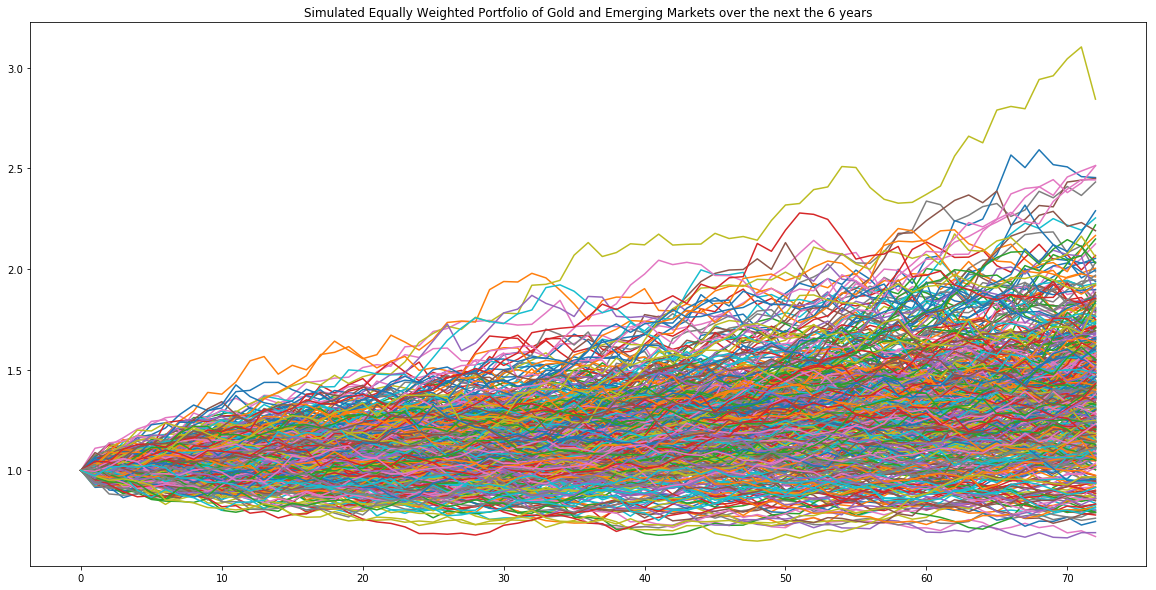

In [144]:
# Visualize the Simulation
portfolio_cumulative_returns.plot(
    legend=None,
    title="Simulated Equally Weighted Portfolio of Gold and Emerging Markets over the next the 6 years",
    figsize=(20,10)
)

In [145]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)(I ran this for 30yrs of data thinking this was a typo, if not, place[-1] w/ [5040, :]) 
final_returns = portfolio_cumulative_returns.iloc[-1, :]

In [146]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
final_returns = portfolio_cumulative_returns.tail(1).T
final_returns.head()

,72
0,1.085039
1,1.608088
2,1.796636
3,0.873581
4,1.482400


In [147]:
# Display the 90% confidence interval for the ending returns
confidence_interval = final_returns.quantile(q=[0.05, 0.95], numeric_only=True)
confidence_interval

,72
0.05,0.882478
0.95,1.946571


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

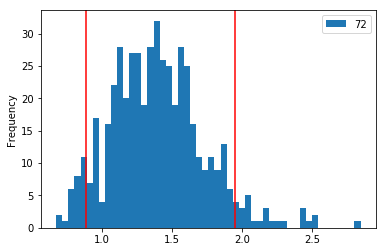

In [148]:
# Visualize the distribution of the ending returns
plt.figure()
plt.figure();
final_returns.plot.hist(bins=50)
plt.axvline(confidence_interval.iloc[0, 0], color="r")
plt.axvline(confidence_interval.iloc[1, 0], color="r")

Future Investment Analysis

In [149]:
# Compute cumulative returns
confidence_interval = final_returns.quantile([.1, .5, .9])
print(confidence_interval)

           72
0.1  0.973961
0.5  1.377286
0.9  1.823179


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

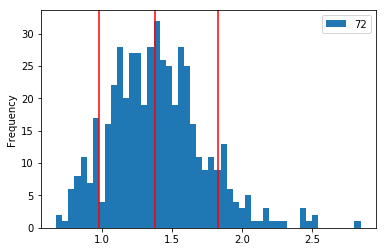

In [150]:
# Visualize (Wasnt required, decided to add this one)
plt.figure()
plt.figure();
final_returns.plot.hist(bins=50)
plt.axvline(confidence_interval.iloc[0, 0], color="r")
plt.axvline(confidence_interval.iloc[1, 0], color="r")
plt.axvline(confidence_interval.iloc[2, 0], color="r")

In [151]:
# Set initial investment
initial_investment = 20000


# Compute expected portfolio return
final_returns = round(initial_investment * final_returns.quantile([.1, .5, .9]))
final_returns.head()

#final_returns['72'] = final_returns.rename['Projected Returns']

,72
0.1,19479.0
0.5,27546.0
0.9,36464.0


In [168]:
def get_cumulative_rtns_2000():
    """Cummulative Returns 2000."""
    cumulative_rtns_2000 = cumulative_returns_2000.hvplot(title="Cumulative Returns 2000").opts(width=1200, height=400)
    return cumulative_rtns_2000


def get_monthly_rtns_2000():
    """Standard Deviation 2000 Portfolio."""
    monthly_rtns_2000 = monthly_returns_2000.hvplot.box(title = 'Portfolio Risk 2000').opts(width=1200, height=700)
    return monthly_rtns_2000

def get_beta_2000_plot():
    """Beta for 2000 Portfolio."""
    beta_2000_plot = beta_df_2000_1.hvplot(kind='bar', title = '2000 Asset Class Beta').opts(width=1500, height=700)
    return beta_2000_plot
    

    
def get_cumulative_rtns_2007():
    """Cumulative Returns 2007."""
    cumulative_rtns_2007 = cumulative_returns_2007.hvplot(title="Cumulative Returns 2007").opts(width=1200, height=400)
    return cumulative_rtns_2007
    
def get_monthly_rtns_2007():
    """Standard Deviation 2007 Portfolio."""
    monthly_rtns_2007 = monthly_returns_2007.hvplot.box(title = 'Portfolio Risk 2007').opts(width=1200, height=700) 
    return monthly_rtns_2007

def get_beta_2007_plot():
    """Beta for 2007 Portfolio."""
    beta_2007_plot = beta_df_2007_1.hvplot(kind='bar', title = '2007 Asset Class Beta').opts(width=1500, height=700)
    return beta_2007_plot
    
def get_cumulative_rtns_2014():
    """Cumulative Returns 2014."""
    cumulative_rtns_2014 = cumulative_returns_2014.hvplot(title="Cumulative Returns 2014").opts(width=1200, height=400)
    return cumulative_rtns_2014


In [169]:
# Organize dashboard into Columns
cumulative_returns_analysis = pn.Column(
    "## Cumulative Performance Comparision",
    get_cumulative_rtns_2000(), 
    get_cumulative_rtns_2007()
)

standard_deviation_analysis = pn.Column(
    "## Portfolio Standard Deviation Comparison",
    get_monthly_rtns_2007(),
    get_monthly_rtns_2000()
)

beta_analysis = pn.Column(
    "## Beta Comparison",
   get_beta_2000_plot(),
   get_beta_2007_plot() 
)

model_portfolio = pn.Column(
    "## 2014 Model Portfolio Returns",
    get_cumulative_rtns_2014()
)

In [170]:
#Organize Tabs for Dashboard
tabs = pn.Tabs(
    ('Cumulative Returns Comparison', cumulative_returns_analysis),
    ('Portfolio Standard Deviation Comparison', standard_deviation_analysis) ,
    ('Portfolio Beta Comparison', beta_analysis),
    ('Model Portfolio Returns', model_portfolio)
    
)
panel = pn.Column('Portfolio Analysis', tabs)

In [171]:
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(NdOverlay)
        [1] Column
            [0] Markdown(str)
            [1] HoloViews(BoxWhisker)
            [2] HoloViews(BoxWhisker)
        [2] Column
            [0] Markdown(str)
            [1] HoloViews(Bars)
            [2] HoloViews(Bars)
        [3] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)